In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset (replace 'your_dataset.csv' with your file)
df = pd.read_csv('data.csv')

# Display the first few rows of the dataset
df.head()

C:\Users\disha\AppData\Local\Temp\ipykernel_29732\2005100213.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [2]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [5]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [10]:
df["price"].dtype

dtype('float64')

In [12]:
subset_df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']]


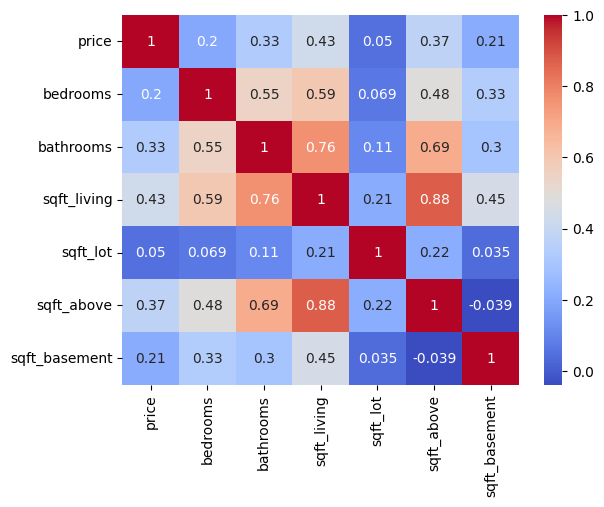

In [13]:
sns.heatmap(subset_df.corr(), annot=True, cmap='coolwarm')
plt.show()

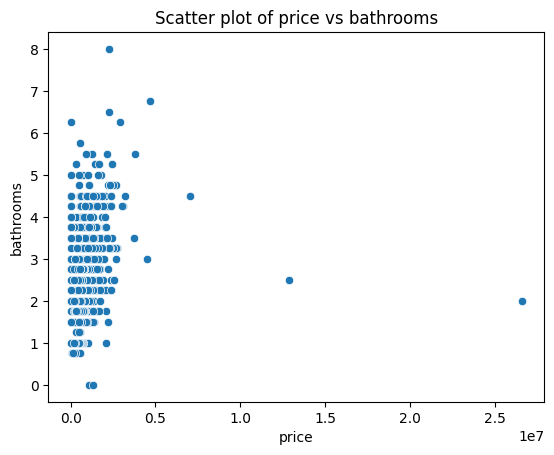

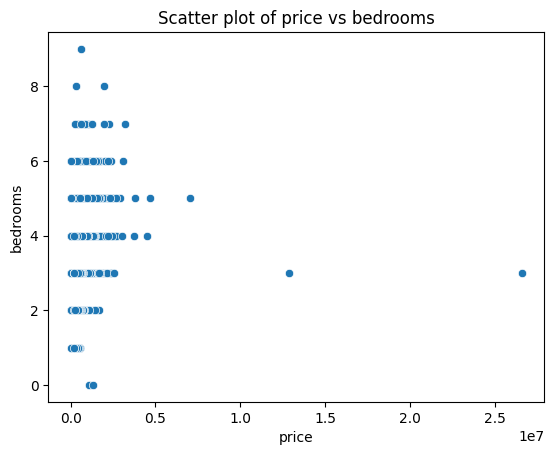

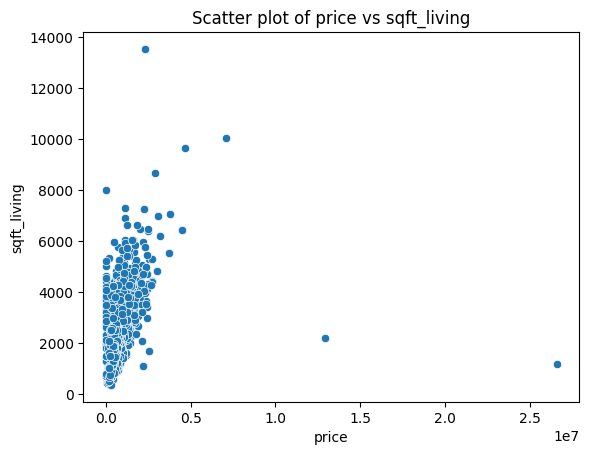

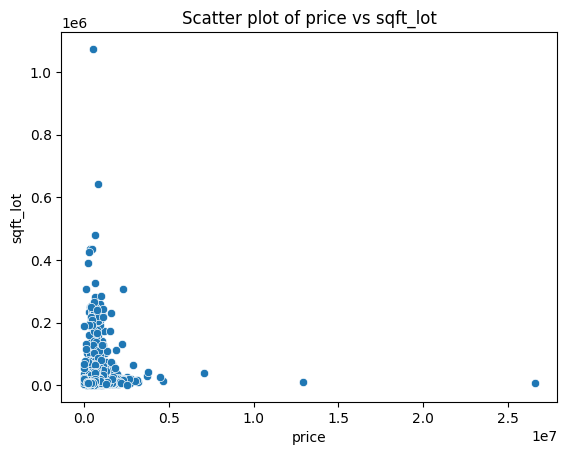

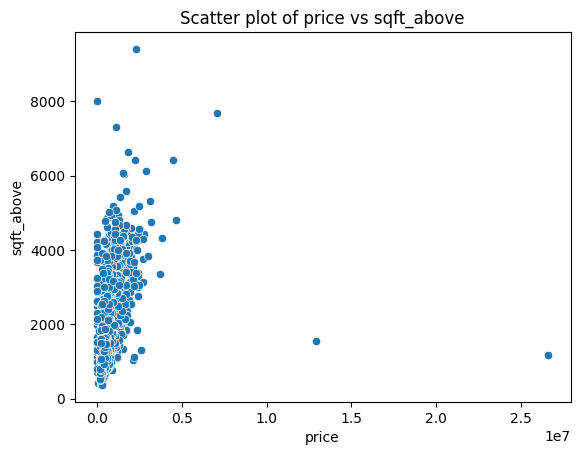

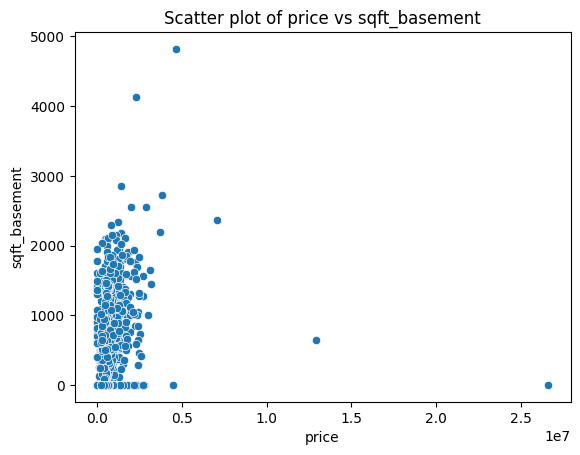

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has columns 'price', 'bedrooms', 'bathrooms', and 'square_footage'
independent_variable = 'price'
dependent_variables =  ['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

# Loop through each dependent variable and create a scatter plot
for dependent_variable in dependent_variables:
    sns.scatterplot(x=independent_variable, y=dependent_variable, data=df)
    plt.title(f'Scatter plot of {independent_variable} vs {dependent_variable}')
    plt.show()


In [22]:

# Handle missing values if necessary
df.dropna(inplace=True)

# Split the data into features (X) and target variable (y)
X = df[[independent_variable]]
y = df[dependent_variable]

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:

# Define the feature set and target variable
X = df[['bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']]
y = df['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of X_train and y_train
print("X_train shape:", X_train.shape)  # Should be (number_of_samples, number_of_features)
print("y_train shape:", y_train.shape)  # Should be (number_of_samples,)

# Reshape y_train if necessary
if y_train.ndim == 1:
    y_train = y_train.values.reshape(-1, 1)

# Initialize the LinearRegression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Optionally, predict and evaluate
y_pred = model.predict(X_test)

# Print the first few predictions
print(y_pred[:5])

X_train shape: (3680, 6)
y_train shape: (3680,)
[[371231.64963063]
 [417161.12335592]
 [822431.04937246]
 [605833.7439421 ]
 [463863.78187572]]


In [28]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Using precision score
model.score(X_test, y_test)


Mean Squared Error: 989968234326.6799


0.029296674004563483

Text(0.5, 1.0, 'Price vs. Sqft_living')

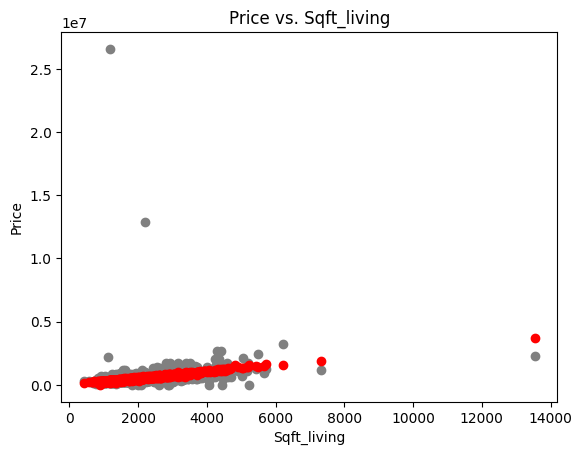

In [41]:
# Visualize the regression for 'square_footage'
plt.scatter(X_test['sqft_living'], y_test, color='gray')
plt.scatter(X_test['sqft_living'], y_pred, color='red')
plt.xlabel('Sqft_living')
plt.ylabel('Price')
plt.title('Price vs. Sqft_living')

Text(0.5, 1.0, 'Price vs. Sqft_above')

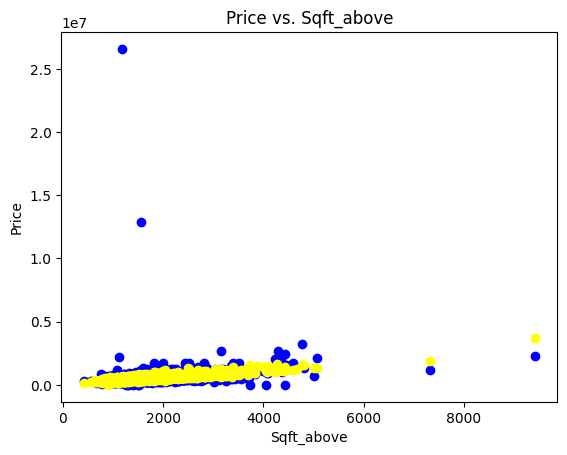

In [42]:
# Visualize the regression for 'square_footage'
plt.scatter(X_test['sqft_above'], y_test, color='blue')
plt.scatter(X_test['sqft_above'], y_pred, color='yellow')
plt.xlabel('Sqft_above')
plt.ylabel('Price')
plt.title('Price vs. Sqft_above')

Text(0.5, 1.0, 'Price vs. Sqft_lot')

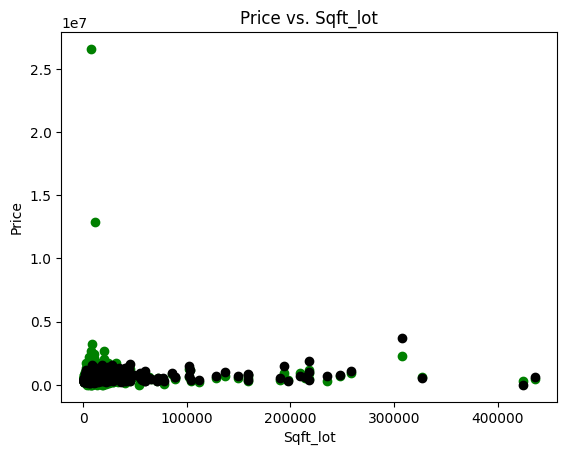

In [43]:
# Visualize the regression for 'square_footage'
plt.scatter(X_test['sqft_lot'], y_test, color='green')
plt.scatter(X_test['sqft_lot'], y_pred, color='black')
plt.xlabel('Sqft_lot')
plt.ylabel('Price')
plt.title('Price vs. Sqft_lot')

Text(0.5, 1.0, 'Price vs. Sqft_basement')

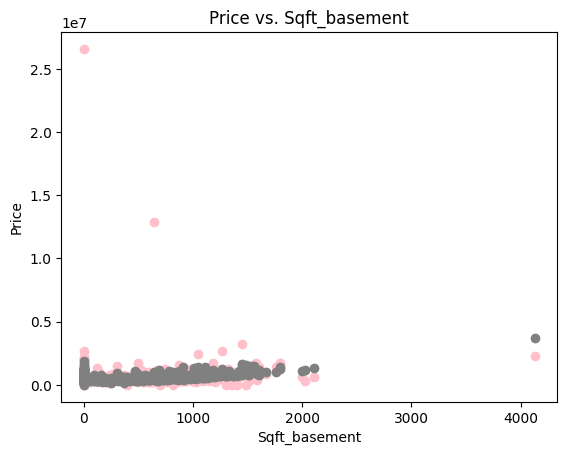

In [44]:
# Visualize the regression for 'square_footage'
plt.scatter(X_test['sqft_basement'], y_test, color='pink')
plt.scatter(X_test['sqft_basement'], y_pred, color='gray')
plt.xlabel('Sqft_basement')
plt.ylabel('Price')
plt.title('Price vs. Sqft_basement')

Text(0.5, 1.0, 'Price vs. bedrooms')

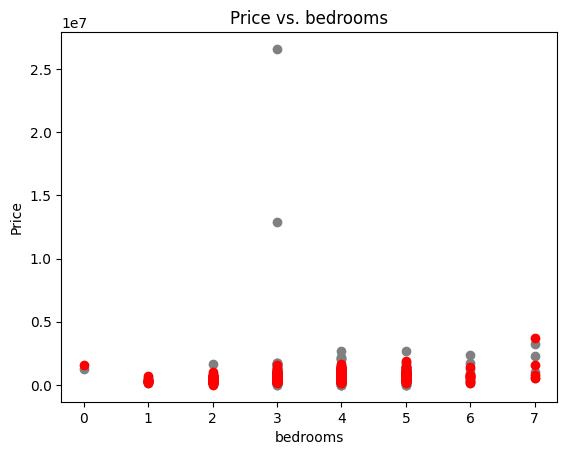

In [45]:
# Visualize the regression for 'square_footage'
plt.scatter(X_test['bedrooms'], y_test, color='gray')
plt.scatter(X_test['bedrooms'], y_pred, color='red')
plt.xlabel('bedrooms')
plt.ylabel('Price')
plt.title('Price vs. bedrooms')

Text(0.5, 1.0, 'Price vs. bathrooms')

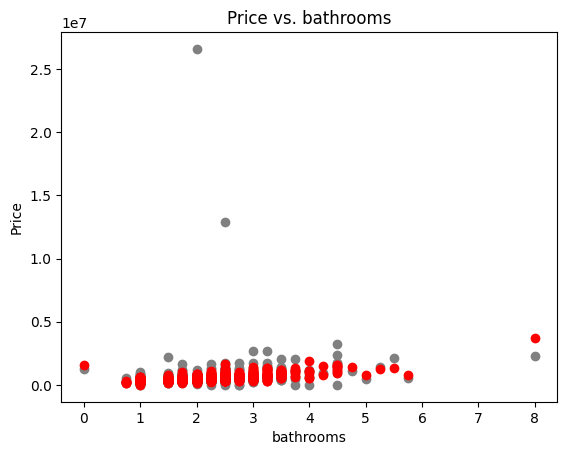

In [46]:
# Visualize the regression for 'square_footage'
plt.scatter(X_test['bathrooms'], y_test, color='gray')
plt.scatter(X_test['bathrooms'], y_pred, color='red')
plt.xlabel('bathrooms')
plt.ylabel('Price')
plt.title('Price vs. bathrooms')